In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

puidata = os.getenv('PUIDATA')

# energy data obtained from:
# https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z
nrg = pd.read_csv(puidata + "/" + "Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

# building data obtained from:
# http://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page
bsize = pd.read_csv(puidata + "/" + "MN.csv")

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
nrg.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [3]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [4]:
from pandas.tools.plotting import scatter_matrix
#scatter_matrix (nrg, s=300, figsize=(16, 16))

In [5]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AreaSource', 'AssessLand', 'AssessTot', \
            'BldgArea', 'BldgClass', 'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',\
            'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR', 'CondoNo', 'Council', \
            'EDesigNum', 'Easements', 'ExemptLand', 'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', \
            'GarageArea', 'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot', 'LotArea',\
            'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'NumBldgs', 'NumFloors', 'OfficeArea', \
            'OtherArea', 'Overlay1', 'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct', 'ProxCode',\
            'ResArea', 'ResidFAR', 'RetailArea', 'SPDist1', 'SPDist2', 'Sanborn', \
            'SanitBoro','SanitDistrict', 'SanitSub', 'SchoolDist', 'SplitZone', 'SPDist3', 'StrgeArea', 'TaxMap', 'Tract2010',\
            'Version', 'XCoord', 'YCoord', 'YearAlter1', 'YearAlter2', 'ZMCode', 'ZipCode', 'ZoneDist1', \
            'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap'], axis=1, inplace=True)

In [6]:
nrg = nrg.loc[:,['BBL','Site EUI(kBtu/ft2)','Reported Property Floor Area (Building(s)) (ft²)']]

In [7]:
def tonumeric(x):
    x = pd.to_numeric(x, errors = 'coerce')
    return x

In [8]:
nrg['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'].apply(tonumeric)
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].apply(tonumeric)

In [9]:
nrg.dtypes

BBL                                                 float64
Site EUI(kBtu/ft2)                                  float64
Reported Property Floor Area (Building(s)) (ft²)    float64
dtype: object

In [10]:
bsize.dtypes

UnitsRes        int64
UnitsTotal      int64
YearBuilt       int64
BBL           float64
dtype: object

In [11]:
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))

invalid entries changed to NaN 4623


In [12]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape

(5085, 6)

In [13]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,330000.0,0,56,1977
10,1.010140e+09,154.9,841709.0,0,2,1999
15,1.007660e+09,122.3,59468.0,0,8,1912
16,1.008150e+09,117.0,364000.0,0,24,1954
18,1.005050e+09,82.1,235370.0,0,24,1926


Text(0.5,0.98,'Graphing relationships between variables in the building energy dataset')

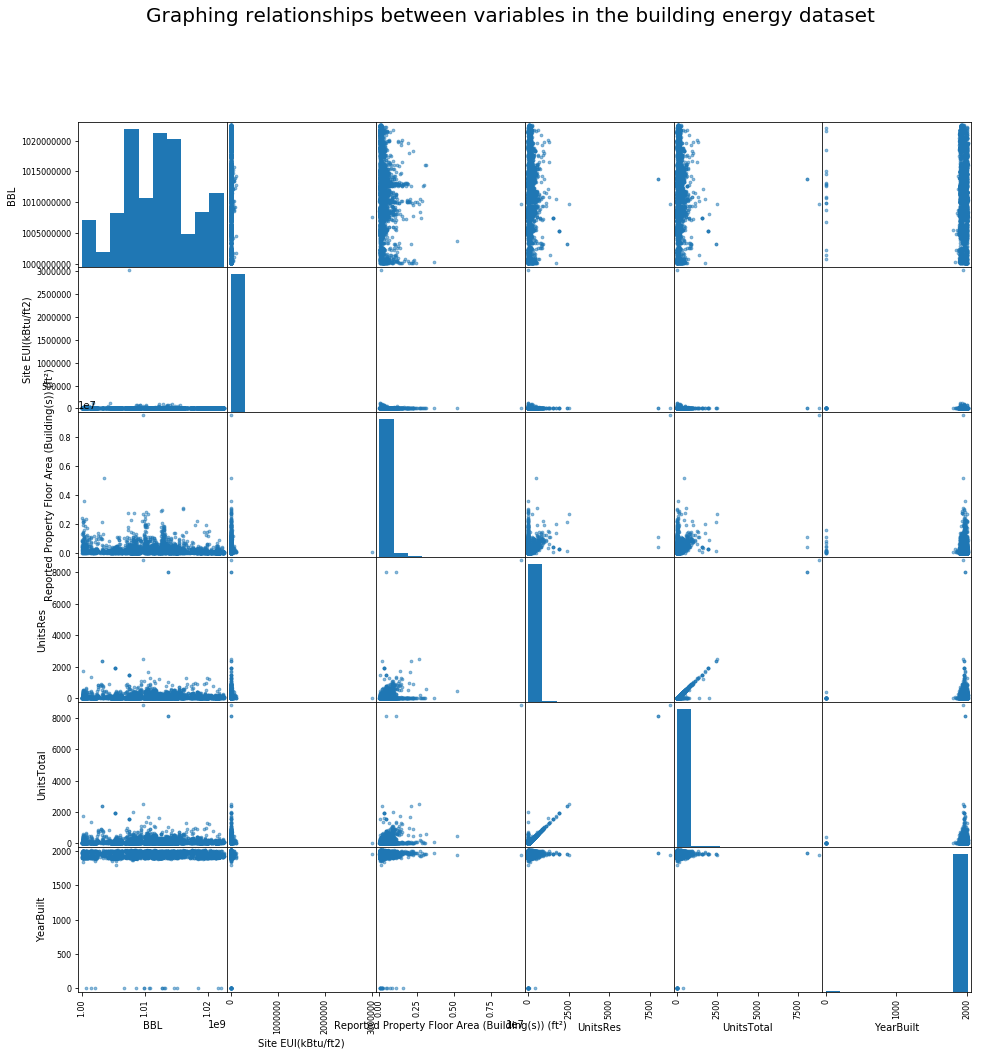

In [14]:
scatter_matrix(bblnrgdata, s=30, figsize=(16, 16));
plt.suptitle("Graphing relationships between variables in the building energy dataset",fontsize=20)

## Figure 1. Graphs showing the relationship between each variable in the building energy dataset

In [15]:
bblnrgdata['TotalEnergy'] = bblnrgdata['Site EUI(kBtu/ft2)'] *\
                            bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,YearBuilt,TotalEnergy
2,1.013110e+09,125.4,330000.0,0,56,1977,41382000.0
10,1.010140e+09,154.9,841709.0,0,2,1999,130380724.1
15,1.007660e+09,122.3,59468.0,0,8,1912,7272936.4
16,1.008150e+09,117.0,364000.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,235370.0,0,24,1926,19323877.0


Text(0.5,1,'Building Energy Consumption')

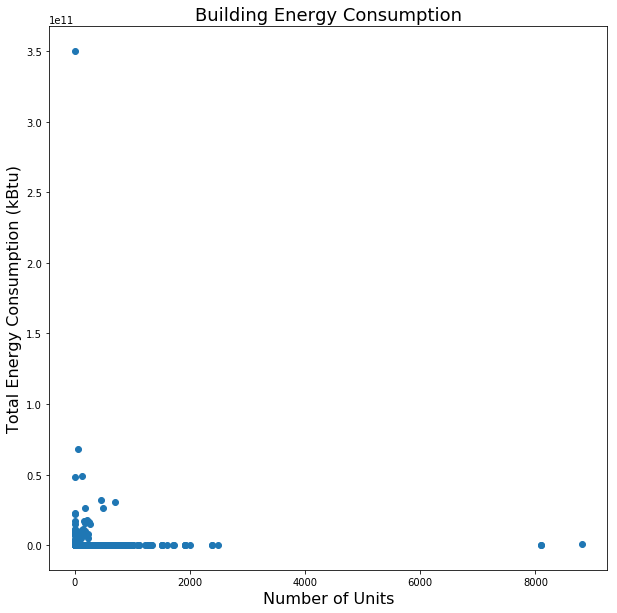

In [16]:
figure(figsize=(10, 10))
plt.scatter(bblnrgdata['UnitsTotal'],bblnrgdata['TotalEnergy'])
plt.xlabel("Number of Units",fontsize=16)
plt.ylabel("Total Energy Consumption (kBtu)",fontsize=16)
plt.title('Building Energy Consumption',fontsize=18)

## Figure 2. The relationship between total building energy consumption and number of units in  New York City. 

Text(0.5,1,'Building Energy Consumption')

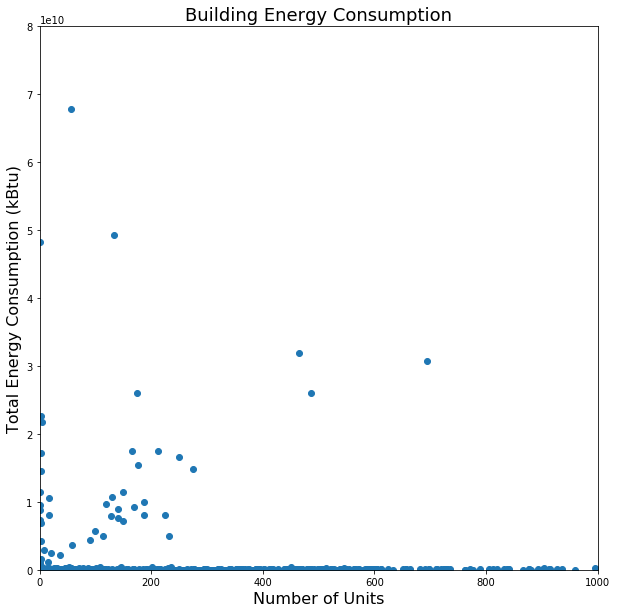

In [17]:
figure(figsize=(10, 10))
plt.scatter(bblnrgdata['UnitsTotal'],bblnrgdata['TotalEnergy'])
plt.xlim(0,1000)
plt.ylim(0,.8e11)
plt.xlabel("Number of Units",fontsize=16)
plt.ylabel("Total Energy Consumption (kBtu)",fontsize=16)
plt.title('Building Energy Consumption',fontsize=18)

## Figure 3. The relationship between total building energy consumption and number of units in New York City. The axes have been limited to exclude several outliers 

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


Text(0.5,1,'Building Energy Consumption')

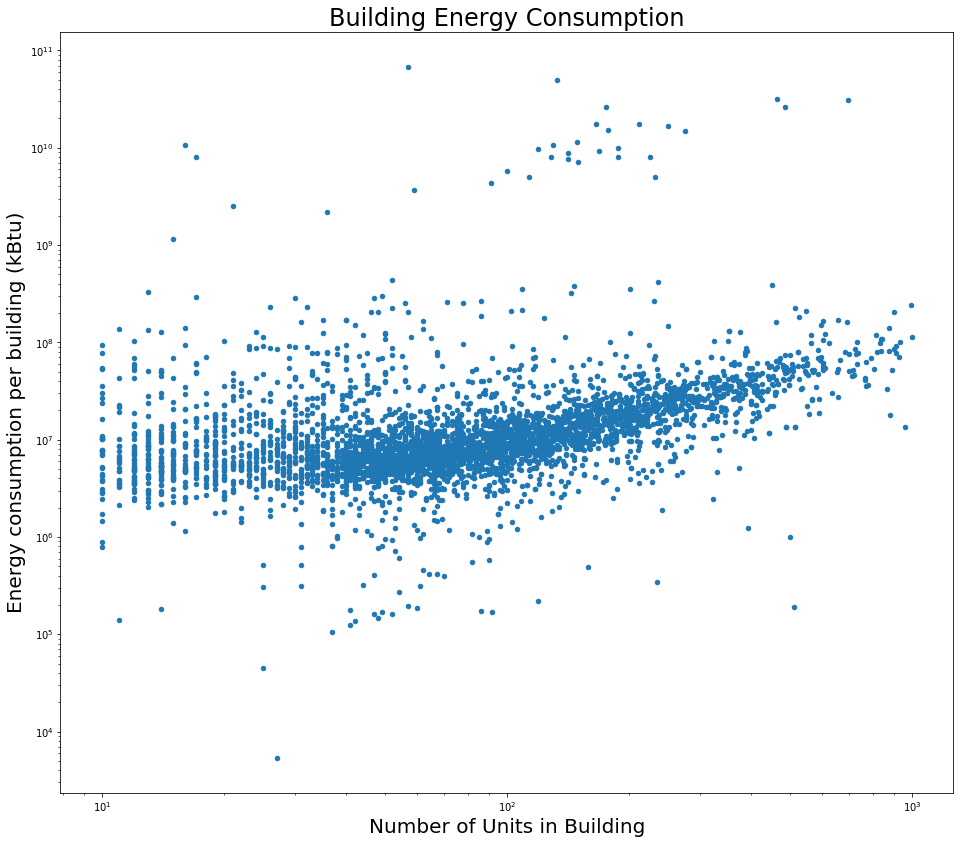

In [18]:
bblnrgdataCut = bblnrgdata[(bblnrgdata.TotalEnergy > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

ax = bblnrgdataCut.plot(kind='scatter', y='TotalEnergy', x='UnitsTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)
ax.set_title('Building Energy Consumption',fontsize=24)

## Figure 4. The relationship between total building energy consumption and number of units in New York City. Outliers and 0 values have been removed, and axes set to a logorithmic scale

In [19]:
x = bblnrgdataCut['UnitsTotal']
y = bblnrgdataCut['TotalEnergy']
X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalEnergy   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.93e-166
Time:                        03:12:51   Log-Likelihood:                -2605.2
No. Observations:                4285   AIC:                             5214.
Df Residuals:                    4283   BIC:                             5227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1089      0.033    186.025      0.000         6.045     6.173
UnitsTotal     0.4904      0.017     28.758      0.000         0.457     0.524
==============================================================================
Omnibus:                     2272.854   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43917.184
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      18.114   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Independent Variable: Building Units
## Dependent Variable: Total Building Energy Consumption

It would be assumed that the number of units in a building will effect the building's energy consumption, as more units mean more people who use energy. This means energy will be dependent on change in units.

Text(0.5,1,'Building Energy Consumption')

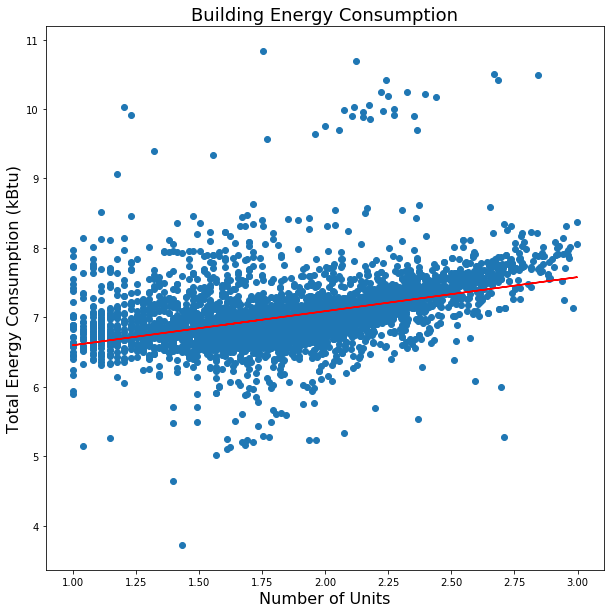

In [20]:
#ax = bblnrgdataCut.plot(kind='scatter', y='TotalEnergy', x='UnitsTotal', 
#                   marker='o',  figsize=(16, 14), loglog=True)
#yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
#xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)
figure(figsize=(10, 10))
plt.scatter(np.log10(x),np.log10(y))
plt.plot(np.log10(bblnrgdataCut.UnitsTotal),linmodel.predict(X),'-',c='r')
plt.xlabel("Number of Units",fontsize=16)
plt.ylabel("Total Energy Consumption (kBtu)",fontsize=16)
plt.title('Building Energy Consumption',fontsize=18)

## Figure 5. The relationship between total building energy consumption and number of units in New York City. Outliers and 0 values have been removed, and axes set to a logorithmic scale. The data have been fitted with a linear model.

In [21]:
X2 = sm.add_constant(np.log10(y))
linmodel2 = sm.OLS(np.log10(x), X2, missing='drop').fit()
linmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.93e-166
Time:                        03:12:51   Log-Likelihood:                -1756.8
No. Observations:                4285   AIC:                             3518.
Df Residuals:                    4283   BIC:                             3530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -0.4369      0.081     -5.400      0.000        -0.596    -0.278
TotalEnergy     0.3300      0.011     28.758      0.000         0.308     0.353
==============================================================================
Omnibus:                      144.802   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.337
Skew:                          -0.457   Prob(JB):                     2.51e-35
Kurtosis:                       3.241   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Building Energy Consumption')

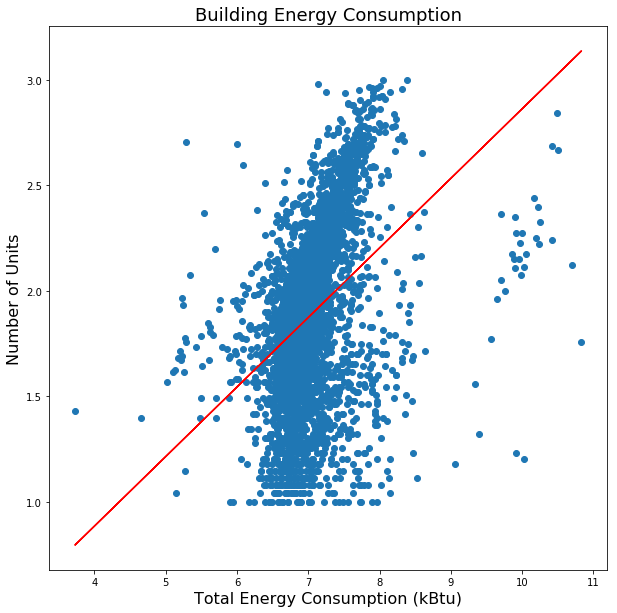

In [22]:
figure(figsize=(10, 10))
plt.scatter(np.log10(y),np.log10(x))
plt.plot(np.log10(bblnrgdataCut.TotalEnergy),linmodel2.predict(X2),'-',c='r')
plt.xlabel("Total Energy Consumption (kBtu)",fontsize=16)
plt.ylabel("Number of Units",fontsize=16)
plt.title('Building Energy Consumption',fontsize=18)

## Figure 6. Switching the axes to show the relationship between number of units and total building energy consumption in New York City. Outliers and 0 values have been removed, and axes set to a logorithmic scale. The data have been fitted with a linear model.

In [23]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [24]:
bblnrgdataCut.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,YearBuilt,TotalEnergy
2,1.013110e+09,125.4,330000.0,0,56,1977,41382000.0
16,1.008150e+09,117.0,364000.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,235370.0,0,24,1926,19323877.0
19,1.021420e+09,137.7,64806.0,54,62,1924,8923786.2
20,1.021750e+09,103.2,62839.0,75,85,1920,6484984.8


In [25]:
#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
errorsnrg = np.sqrt((bblnrgdataCut['Reported Property Floor Area (Building(s)) (ft²)'])**2 +\
                (bblnrgdataCut['Site EUI(kBtu/ft2)']**2))

## Assume count statistics in the number of units as well
errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

#These errors need to be propagated properly through the log

errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.TotalEnergy / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The functional form used was the root sum of squares, used to estimate uncertainities in both datasets.

In [27]:
# Energy vs units
y1 = np.log10(bblnrgdataCut.TotalEnergy)
y2 = np.log10(bblnrgdataCut.UnitsTotal)

y1_fit = linmodel.params[0] + linmodel.params[1] * y2
y2_fit = linmodel2.params[0] + linmodel2.params[1] * y1


chisq = (((y1 - y1_fit)**2) / errorsInLogNrg**2).sum()
#chi2(bblnrgdataCut['TotalEnergy'],linmodel)
print("Chi Squared for Energy vs. Units: ",chisq)

Chi Squared for Energy vs. Units:  3.56979723055e+12


In [28]:
# Units vs energy

chisq2 = (((y2 - y2_fit)**2) / errorsInLogUnits**2).sum()
#chi2(bblnrgdataCut['TotalEnergy'],linmodel)
print("Chi Squared for Units vs. Energy: ",chisq2)

Chi Squared for Units vs. Energy:  491759.260372


Both results are statistically significant because they are larger than the chi square of 3.841 associated with the 0.05 p-value.

In [29]:
dfLogs = np.log10(bblnrgdataCut[['TotalEnergy','UnitsTotal']])
dfLogs = dfLogs.sort(['TotalEnergy'])
dfLogs.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,TotalEnergy,UnitsTotal
3834,3.727866,1.431364
3840,4.650319,1.397940
5794,5.021189,1.568202
5748,5.099424,1.612784
5802,5.132516,1.623249


In [30]:
curvemodel = smf.ols(formula = "dfLogs['UnitsTotal'] ~ I(dfLogs['TotalEnergy']**2) + dfLogs['TotalEnergy']",data = dfLogs).fit()
curvemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     dfLogs['UnitsTotal']   R-squared:                       0.182
Model:                              OLS   Adj. R-squared:                  0.181
Method:                   Least Squares   F-statistic:                     475.0
Date:                  Mon, 04 Dec 2017   Prob (F-statistic):          4.74e-187
Time:                          03:22:24   Log-Likelihood:                -1705.7
No. Observations:                  4285   AIC:                             3417.
Df Residuals:                      4282   BIC:                             3437.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                        -4.4298      0.401    -11.050      0.000        -5.216    -3.644
I(dfLogs['TotalEnergy'] ** 2)    -0.0725      0.007    -10.164      0.000        -0.086    -0.059
dfLogs['TotalEnergy']             1.4101      0.107     13.195      0.000         1.201     1.620
==============================================================================
Omnibus:                      111.864   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.219
Skew:                          -0.378   Prob(JB):                     1.75e-27
Kurtosis:                       3.346   Cond. No.                     3.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Building Energy Consumption')

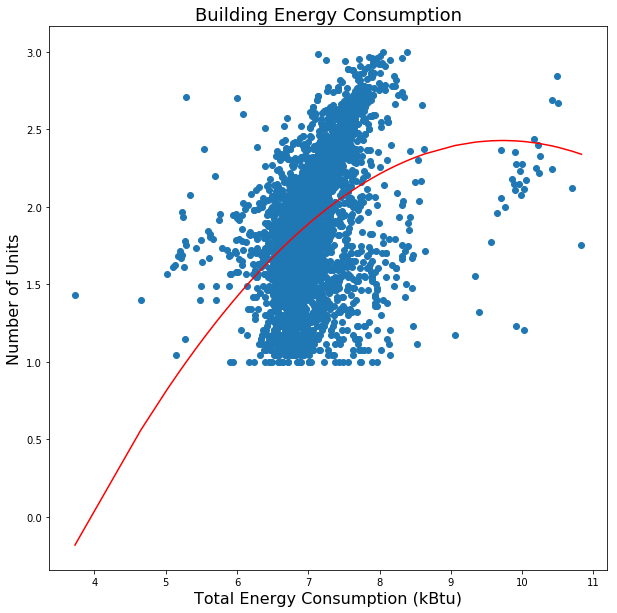

In [31]:
figure(figsize=(10, 10))
plt.scatter(np.log10(y),np.log10(x))
plt.plot(dfLogs['TotalEnergy'],curvemodel.predict(),'-',c='r')
plt.xlabel("Total Energy Consumption (kBtu)",fontsize=16)
plt.ylabel("Number of Units",fontsize=16)
plt.title('Building Energy Consumption',fontsize=18)

## Figure 8. Switching the axes to show the relationship between number of units and total building energy consumption in New York City. Outliers and 0 values have been removed, and axes set to a logorithmic scale. The data have been fitted with a second degree polynomial.

In [32]:
print ("LR : ", -2 * (-linmodel2.llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linmodel2))

LR :  -102.155245643
LR from statsmodels: (102.15524564272346, 5.1336706861871001e-24, 1.0)


Because the chi squared value of 102.155 is much higher than the 3.841 value from the chi squared table for a p value of 0.05 and 1 degree of freedom, the null hypothesis can be rejected. This means the more complex model better explains the data then the less complex (linear) model.

GRade: 10/10